# Postures
## Group 11
## **Ananya**
## **Sachini**
## **Mohammad Rafi Shaik**


In [1]:
"""
Importing Libraries
"""

import pandas as pd 
import numpy as np
import math
from tqdm import tqdm
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import matplotlib.colors as pltcolors
from sklearn.preprocessing import label_binarize

import tensorflow as tf 
from tensorflow.python.framework import ops 


import gc 
from datetime import datetime
from sklearn.preprocessing import PowerTransformer,StandardScaler
%matplotlib inline

sns.set(style='darkgrid',palette='muted',color_codes=True)
import tqdm.notebook as tq
from scipy.special import expit
from scipy import stats ,optimize 
import random 
#!pip install ipython-autotime
#%load_ext autotime 


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')


In [2]:
"""
Import dataset
"""
from google.colab import files
uploaded = files.upload()

df_m = pd.read_csv("Postures.csv") 
df_m.head()

Saving Postures.csv to Postures (1).csv


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [3]:
df = df_m.copy()

# Exploratory Data Analysis

In [4]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object

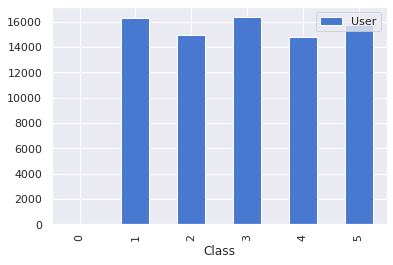

In [5]:
df[['Class', 'User']].groupby('Class').count().plot.bar()

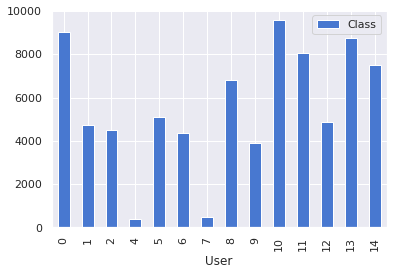

In [6]:
df[['Class', 'User']].groupby('User').count().plot.bar()

Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.883528
Y3        0.883528
Z3        0.883528
X4        3.995083
Y4        3.995083
Z4        3.995083
X5       16.675630
Y5       16.675630
Z5       16.675630
X6       33.097726
Y6       33.097726
Z6       33.097726
X7       50.133169
Y7       50.133169
Z7       50.133169
X8       60.863553
Y8       60.863553
Z8       60.863553
X9       69.309568
Y9       69.309568
Z9       69.309568
X10      81.109148
Y10      81.109148
Z10      81.109148
X11      99.959025
Y11      99.959025
Z11      99.959025
dtype: float64


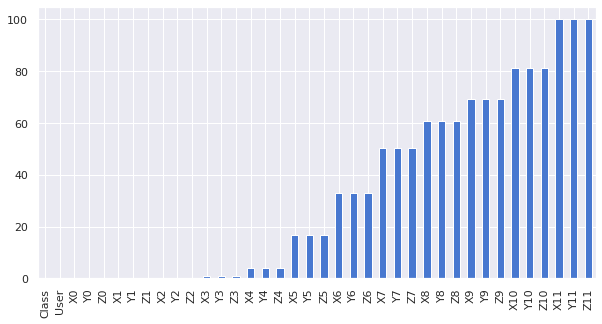

In [7]:
"""
From Dataset description, empty/null values are identified by `?`.
"""

missing_df = (df == '?').sum() * 100 / len(df)
print(missing_df)
missing_df.plot.bar(figsize=(10, 5))

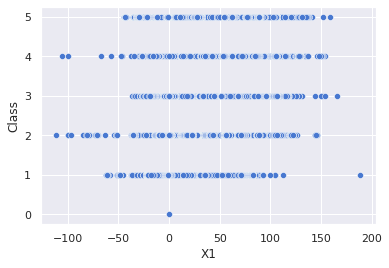

In [8]:
plt1 = sns.scatterplot(x="X1", y="Class", data=df)
#plt2 = sns.scatterplot(x="Y1", y="Class", data=df)
#plt3 = sns.scatterplot(x="Z1", y="Class", data=df)


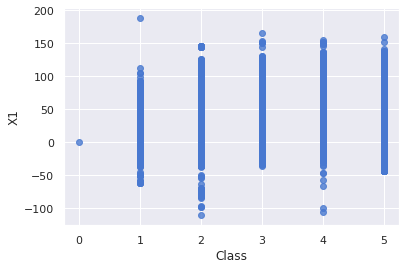

In [9]:
sns.regplot(x=df["Class"], y=df["X1"], fit_reg=False)

In [10]:

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
Class,1.000000,-0.030667,0.080209,0.081808,0.051832,-0.010528,0.144135,0.089894,-0.052351,0.169296,0.095512
User,-0.030667,1.000000,-0.013723,0.070217,0.192016,-0.042628,0.041793,0.183271,-0.059501,0.001024,0.155586
X0,0.080209,-0.013723,1.000000,-0.285254,-0.236433,0.124124,-0.009039,0.033096,0.106164,-0.012656,0.023483
Y0,0.081808,0.070217,-0.285254,1.000000,0.550998,-0.001266,0.133322,0.225545,0.005438,0.082158,0.187781
Z0,0.051832,0.192016,-0.236433,0.550998,1.000000,0.014794,0.209590,0.464174,0.008743,0.149581,0.420451
X1,-0.010528,-0.042628,0.124124,-0.001266,0.014794,1.000000,-0.293786,-0.261213,0.139548,-0.050947,-0.012322
Y1,0.144135,0.041793,-0.009039,0.133322,0.209590,-0.293786,1.000000,0.572763,-0.027720,0.108076,0.184162
Z1,0.089894,0.183271,0.033096,0.225545,0.464174,-0.261213,0.572763,1.000000,-0.009244,0.175152,0.455485
X2,-0.052351,-0.059501,0.106164,0.005438,0.008743,0.139548,-0.027720,-0.009244,1.000000,-0.316701,-0.299826
Y2,0.169296,0.001024,-0.012656,0.082158,0.149581,-0.050947,0.108076,0.175152,-0.316701,1.000000,0.587785


In [11]:
df1 = np.zeros_like(corr, dtype=bool)
df1[np.triu_indices_from(df1)] = True
corr[df1] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
Class,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
User,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
X0,0.08,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan
Y0,0.08,0.07,-0.29,nan,nan,nan,nan,nan,nan,nan,nan
Z0,0.05,0.19,-0.24,0.55,nan,nan,nan,nan,nan,nan,nan
X1,-0.01,-0.04,0.12,-0.00,0.01,nan,nan,nan,nan,nan,nan
Y1,0.14,0.04,-0.01,0.13,0.21,-0.29,nan,nan,nan,nan,nan
Z1,0.09,0.18,0.03,0.23,0.46,-0.26,0.57,nan,nan,nan,nan
X2,-0.05,-0.06,0.11,0.01,0.01,0.14,-0.03,-0.01,nan,nan,nan
Y2,0.17,0.00,-0.01,0.08,0.15,-0.05,0.11,0.18,-0.32,nan,nan


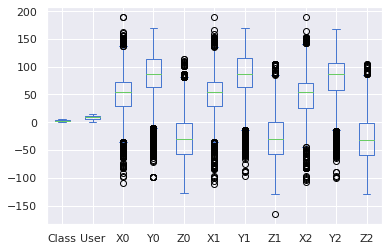

In [12]:
df.plot(kind = 'box')

# Data Cleaning

In [13]:
class EDA:
    def __init__(self)->None:
        pass
    
    def missing_values(self, df, threshold):
        f""" Drop columns which has more than {threshold}% of empty values"""
        
        # First row is empty
        df = df.iloc[1: , :]
        
        missing_df = (df == '?').sum() * 100 / len(df)
        
        columns_to_drop = missing_df[missing_df>threshold].index
        df.drop(columns=columns_to_drop, inplace=True)
        
        return df
    
    def impute_missing_values(self, df):
        df.replace('(\?)',np.NaN, regex=True, inplace = True)
        df = df.astype(float)
        
        missing_df = (df.isnull() | df.isna()).sum()
        for k, v in missing_df.items():
            df[k] = df[k].fillna(df.groupby('Class')[k].transform('mean'))
            
        return df
    
    def split_by_user(self, df, user):
        test = df[df['User'] == user]
        train = df[df['User'] != user]

        test.drop('User', axis=1, inplace=True)
        train.drop('User', axis=1, inplace=True)

        # df = df.astype('int')
        X_train = train.iloc[:, 1:]
        y_train = train['Class']

        X_test = test.iloc[:, 1:]
        y_test = test['Class']
        
        return X_train, X_test, y_train, y_test
    
    def split_random(self, df, t_size):
        df.drop('User', axis=1, inplace=True)
        y = df['Class']
        X = df.drop('Class', axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = t_size, random_state  = 0)
        
        return X_train, X_test, y_train, y_test
        
        
        

In [14]:
df = df_m.copy()
eda = EDA()

df = eda.missing_values(df, 15)
df = eda.impute_missing_values(df)


# Modelling

In [15]:
class PreModelling:
  def __init__(self,) -> None:
    pass

  def one_vs_rest_dfs():
    
    df['BClass'] = 1
    dfs = {}
    for i in range(1,6):
      dfs[f'df{i}'] = df.copy()

      dfs[f'df{i}'].loc[dfs[f'df{i}']['Class'] != i, 'BClass'] = -1

      train_df = dfs[f'df{i}'][dfs[f'df{i}']["User"] != 0]

      train_X, train_y = train_df.values[:, 2:-1],train_df.values[:, -1]

      dfs[f'train_X{i}']=train_X
      dfs[f'train_y{i}']=train_y
    return dfs 

  def compute_roc(y_true, y_pred):

    y_true1, y_pred1 = y_true.copy(), y_pred.copy()
    y_true2, y_pred2 = y_true.copy(), y_pred.copy()
    y_true3, y_pred3 = y_true.copy(), y_pred.copy()
    y_true4, y_pred4 = y_true.copy(), y_pred.copy()
    y_true5, y_pred5 = y_true.copy(), y_pred.copy()

    y_true1[y_true1 != 1.0] = 0
    y_pred1[y_pred1 != 1.0] = 0

    y_true2[y_true2 != 2] = 0
    y_true2[y_true2 == 2] = 1
    y_pred2[y_pred2 != 2] = 0
    y_pred2[y_pred2 == 2] = 1

    y_true3[y_true3 != 3] = 0
    y_true3[y_true3 == 3] = 1
    y_pred3[y_pred3 != 3] = 0
    y_pred3[y_pred3 == 3] = 1

    y_true4[y_true4 != 4] = 0
    y_true4[y_true4 == 4] = 1
    y_pred4[y_pred4 != 4] = 0
    y_pred4[y_pred4 == 4] = 1

    y_true5[y_true5 != 5] = 0
    y_true5[y_true5 == 5] = 1
    y_pred5[y_pred5 != 5] = 0
    y_pred5[y_pred5 == 5] = 1

    fpr, tpr, _ = metrics.roc_curve(y_true1, y_pred1)
    auc_score = metrics.auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 1")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true2, y_pred2)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 2")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true3, y_pred3)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 3")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true4, y_pred4)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 4")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true5, y_pred5)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 5")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    return fpr, tpr, auc_score



  
  



# Model 1: Logistic Regression

In [16]:
#1 Vs all implementation
df['BClass'] = 1

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

#Create 5 different datasets
df1.loc[df1['Class'] != 1, 'BClass'] = 0
df2.loc[df2['Class'] != 2, 'BClass'] = 0
df3.loc[df3['Class'] != 3, 'BClass'] = 0
df4.loc[df4['Class'] != 4, 'BClass'] = 0
df5.loc[df5['Class'] != 5, 'BClass'] = 0

train_df1 = df1[df1["User"] != 0]
train_df2 = df2[df2["User"] != 0]
train_df3 = df3[df3["User"] != 0]
train_df4 = df4[df4["User"] != 0]
train_df5 = df5[df5["User"] != 0]
test_df = df[df["User"] == 0]
test_df['BClass'] = test_df['Class']

In [17]:
from numpy.ma.core import log2
class LogisticRegression:

  def __init__(self,X1,y1,X2,y2,X3,y3,X4,y4,X5,y5,X_test,y_test,learningRate,tolerance,maxIteration,lamda,regularization):

    self.X1 = X1
    self.y1 = y1
    self.X2 = X2
    self.y2 = y2
    self.X3 = X3
    self.y3 = y3
    self.X4 = X4
    self.y4 = y4
    self.X5 = X5
    self.y5 = y5
    self.X_test = X_test
    self.y_test=y_test
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration
    self.lamda=lamda
    self.regularization = regularization

  def addX0(self,X):
    return np.column_stack([np.ones([X.shape[0]]),X])
  
  def sigmoid(self,z):
    sig = 1/(1+np.exp(-z))
    return sig

  def softmax(self,z1,z2,z3,z4,z5):
    z = [z1,z2,z3,z4,z5]

    exp = np.exp(z)

    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])

    return exp.T

  
  def costFunction1(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w1))) - X.dot(self.w1).dot(y) 

    if self.regularization == 'l1':
      reg = self.lamda * (self.w1)
      cost = pred_.sum() + reg.sum()
    
    elif self.regularization == 'l2':
      reg = self.lamda * (np.square(self.w1))
      cost = pred_.sum() + reg.sum()
    else:
      cost = pred_.sum()

    return cost
  
  def costFunction2(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w2))) - X.dot(self.w2).dot(y) 

    if self.regularization == 'l1':
      reg = self.lamda * (self.w2)
      cost = pred_.sum() + reg.sum()
    
    elif self.regularization == 'l2':
      reg = self.lamda * (np.square(self.w2))
      cost = pred_.sum() + reg.sum()
    
    else:
      cost = pred_.sum()

    return cost
  
  def costFunction3(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w3))) - X.dot(self.w3).dot(y) 

    if self.regularization == 'l1':
      reg = self.lamda * (self.w3)
      cost = pred_.sum() + reg.sum()
    
    elif self.regularization == 'l2':
      reg = self.lamda * (np.square(self.w3))
      cost = pred_.sum() + reg.sum()
    
    else:
      cost = pred_.sum()

    return cost
  
  def costFunction4(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w4))) - X.dot(self.w4).dot(y) 

    if self.regularization == 'l1':
      reg = self.lamda * (self.w4)
      cost = pred_.sum() + reg.sum()
    
    elif self.regularization == 'l2':
      reg = self.lamda * (np.square(self.w4))
      cost = pred_.sum() + reg.sum()
    
    else:
      cost = pred_.sum()
    
    return cost

  def costFunction5(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w5))) - X.dot(self.w5).dot(y) 

    if self.regularization == 'l1':
      reg = self.lamda * (self.w5)
      cost = pred_.sum() + reg.sum()
    
    elif self.regularization == 'l2':
      reg = self.lamda * (np.square(self.w5))
      cost = pred_.sum() + reg.sum()
    
    else:
      cost = pred_.sum()

    return cost

  def gradient1(self, X, y):
    sig = self.sigmoid(X.dot(self.w1))

    grad = (sig - y).dot(X)

    return grad
  
  def gradient2(self, X, y):
    sig = self.sigmoid(X.dot(self.w2))

    grad = (sig - y).dot(X)

    return grad

  def gradient3(self, X, y):
    sig = self.sigmoid(X.dot(self.w3))

    grad = (sig - y).dot(X)

    return grad
  
  def gradient4(self, X, y):
    sig = self.sigmoid(X.dot(self.w4))

    grad = (sig - y).dot(X)

    return grad
  
  def gradient5(self, X, y):
    sig = self.sigmoid(X.dot(self.w5))

    grad = (sig - y).dot(X)

    return grad

  def gradientDescent1(self, X, y):
    errors=[]
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w1 = self.w1 - self.learningRate * self.gradient1(X, y)
      curr = self.costFunction1(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
       print('Model stopped')
       break

    self.plot_cost(errors)
    return

  def gradientDescent2(self, X, y):
    errors=[]
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w2 = self.w2 - self.learningRate * self.gradient2(X, y)
      curr = self.costFunction2(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
       print('Model stopped')
       break

    self.plot_cost(errors)
    return

  def gradientDescent3(self, X, y):
    errors=[]
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w3 = self.w3 - self.learningRate * self.gradient3(X, y)
      curr = self.costFunction3(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
       print('Model stopped')
       break

    self.plot_cost(errors)
    return
  
  def gradientDescent4(self, X, y):
    errors=[]
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w4 = self.w4 - self.learningRate * self.gradient4(X, y)
      curr = self.costFunction4(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
       print('Model stopped')
       break

    self.plot_cost(errors)
    return
  
  def gradientDescent5(self, X, y):
    errors=[]
    last = float('inf')

    for i in tqdm_notebook(range(self.maxIteration)):
      self.w5 = self.w5 - self.learningRate * self.gradient5(X, y)
      curr = self.costFunction5(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
       print('Model stopped')
       break

    self.plot_cost(errors)
    return

  def predictMulticlass(self, X):
    
    som = self.softmax(X.dot(self.w1),X.dot(self.w2),X.dot(self.w3),X.dot(self.w4),X.dot(self.w5))

    return np.argmax(som,axis=1)+1

  def evaluate(self, y, y_hat):
    y=(y ==1)
    y_hat = (y_hat ==1)

    precision = (y & y_hat).sum()/y_hat.sum()

    recall = (y & y_hat).sum()/y.sum()

    fscore = 2 * (precision*recall)/(precision+recall)

    return fscore, recall, precision


  def run_model(self):
    self.X1_train = self.X1
    self.y1_train = self.y1
    self.w1 = np.ones(self.X1_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent1(self.X1_train, self.y1_train)

    self.X2_train = self.X2
    self.y2_train = self.y2
    self.w2 = np.ones(self.X2_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent2(self.X2_train, self.y2_train)

    self.X3_train = self.X3
    self.y3_train = self.y3
    self.w3 = np.ones(self.X3_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent3(self.X3_train, self.y3_train)

    self.X4_train = self.X4
    self.y4_train = self.y4
    self.w4 = np.ones(self.X4_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent4(self.X4_train, self.y4_train)

    self.X5_train = self.X5
    self.y5_train = self.y5
    self.w5 = np.ones(self.X5_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent5(self.X5_train, self.y5_train)



    y_hat_test = self.predictMulticlass(self.X_test)
    #Print classification report
    print(metrics.classification_report(self.y_test, y_hat_test, digits=3))
    #ROC curves
    self.compute_roc(self.y_test,y_hat_test)

  def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

      
  def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

  def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

  def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()

  def compute_roc(self,y_true, y_pred):

    y_true1, y_pred1 = y_true.copy(), y_pred.copy()
    y_true2, y_pred2 = y_true.copy(), y_pred.copy()
    y_true3, y_pred3 = y_true.copy(), y_pred.copy()
    y_true4, y_pred4 = y_true.copy(), y_pred.copy()
    y_true5, y_pred5 = y_true.copy(), y_pred.copy()

    y_true1[y_true1 != 1.0] = 0
    y_pred1[y_pred1 != 1.0] = 0

    y_true2[y_true2 != 2] = 0
    y_true2[y_true2 == 2] = 1
    y_pred2[y_pred2 != 2] = 0
    y_pred2[y_pred2 == 2] = 1

    y_true3[y_true3 != 3] = 0
    y_true3[y_true3 == 3] = 1
    y_pred3[y_pred3 != 3] = 0
    y_pred3[y_pred3 == 3] = 1

    y_true4[y_true4 != 4] = 0
    y_true4[y_true4 == 4] = 1
    y_pred4[y_pred4 != 4] = 0
    y_pred4[y_pred4 == 4] = 1

    y_true5[y_true5 != 5] = 0
    y_true5[y_true5 == 5] = 1
    y_pred5[y_pred5 != 5] = 0
    y_pred5[y_pred5 == 5] = 1

    fpr, tpr, _ = metrics.roc_curve(y_true1, y_pred1)
    auc_score = metrics.auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 1")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true2, y_pred2)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 2")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true3, y_pred3)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 3")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true4, y_pred4)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 4")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true5, y_pred5)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 5")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    return fpr, tpr, auc_score



# 1.1 Baseline

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


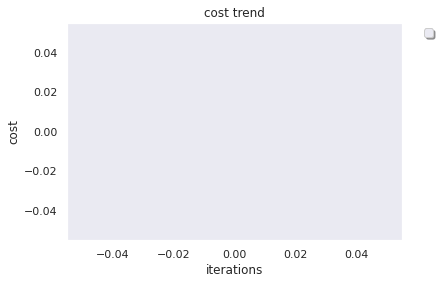

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


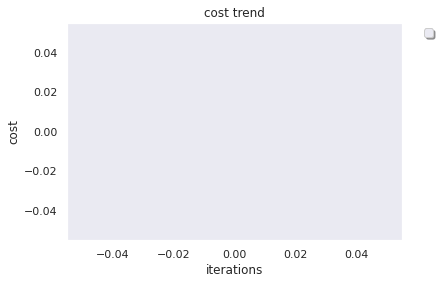

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


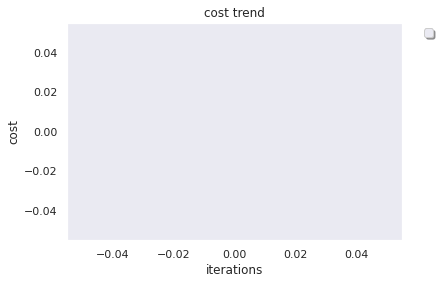

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


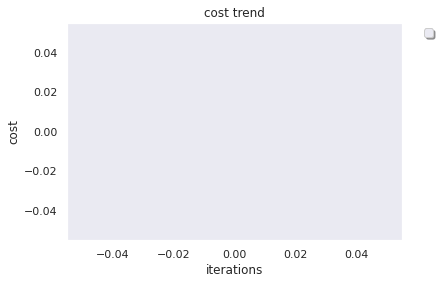

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


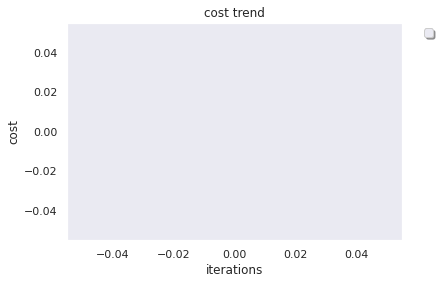

              precision    recall  f1-score   support

         1.0      0.210     0.913     0.341      1872
         2.0      0.181     0.019     0.035      1501
         3.0      0.257     0.102     0.146      1851
         4.0      0.000     0.000     0.000      1781
         5.0      0.000     0.000     0.000      2043

    accuracy                          0.213      9048
   macro avg      0.130     0.207     0.104      9048
weighted avg      0.126     0.213     0.106      9048



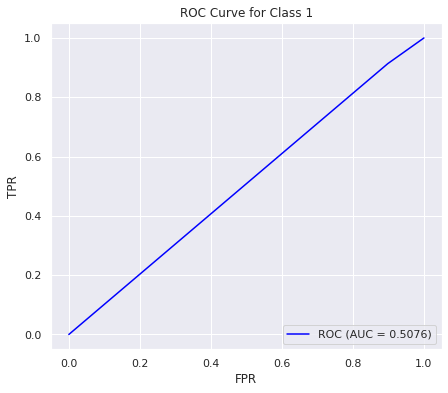

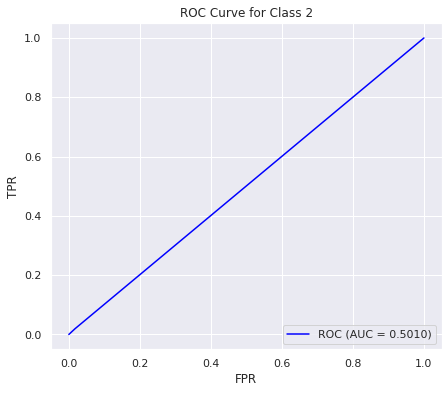

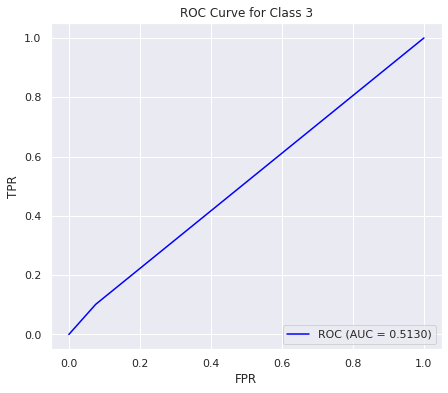

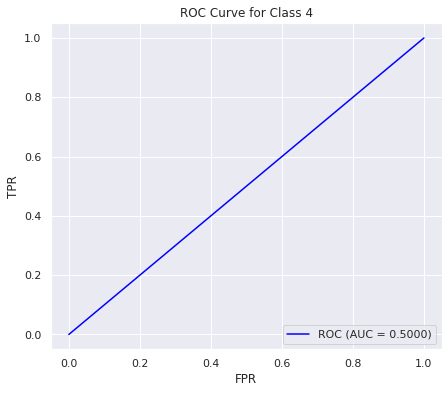

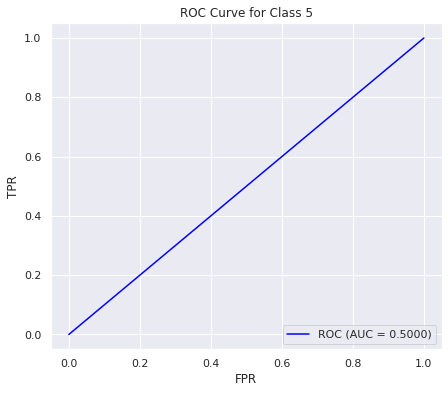

In [18]:
train_X1, train_y1 = train_df1.values[:, 2:-1],train_df1.values[:, -1]
train_X2, train_y2 = train_df2.values[:, 2:-1],train_df2.values[:, -1]
train_X3, train_y3 = train_df3.values[:, 2:-1],train_df3.values[:, -1]
train_X4, train_y4 = train_df4.values[:, 2:-1],train_df4.values[:, -1]
train_X5, train_y5 = train_df5.values[:, 2:-1],train_df5.values[:, -1]
test_df['BClass'] = test_df['Class']
test_X, test_y = test_df.values[:, 2:-1],test_df.values[:, -1]

lr_reg = LogisticRegression(train_X1, train_y1,train_X2,train_y2,train_X3,train_y3,train_X4,train_y4,
                        train_X5,train_y5,
                        test_X, test_y,learningRate = 0.00001, tolerance = 0.0001, maxIteration = 1000,lamda=0.0001,regularization = 'none')

lr_reg.run_model()

# 1.2 Regularization with undersampling

In [19]:
df1 = train_df1[train_df1['BClass'] == 1]
df2 = train_df1[train_df1['BClass'] == 0]
df3 = df2.sample(n=14393,random_state=1)
frames = [df1,df3]
train_df_undersampled = pd.concat(frames)
train_X1, train_y1 = train_df_undersampled.values[:, 2:-1],train_df_undersampled.values[:, -1]

df1 = train_df2[train_df2['BClass'] == 1]
df2 = train_df2[train_df2['BClass'] == 0]
df3 = df2.sample(n=14393,random_state=1)
frames = [df1,df3]
train_df_undersampled = pd.concat(frames)
train_X2, train_y2 = train_df_undersampled.values[:, 2:-1],train_df_undersampled.values[:, -1]

df1 = train_df3[train_df3['BClass'] == 1]
df2 = train_df3[train_df3['BClass'] == 0]
df3 = df2.sample(n=14393,random_state=1)
frames = [df1,df3]
train_df_undersampled = pd.concat(frames)
train_X3, train_y3 = train_df_undersampled.values[:, 2:-1],train_df_undersampled.values[:, -1]

df1 = train_df4[train_df4['BClass'] == 1]
df2 = train_df4[train_df4['BClass'] == 0]
df3 = df2.sample(n=14393,random_state=1)
frames = [df1,df3]
train_df_undersampled = pd.concat(frames)
train_X4, train_y4 = train_df_undersampled.values[:, 2:-1],train_df_undersampled.values[:, -1]

df1 = train_df5[train_df5['BClass'] == 1]
df2 = train_df5[train_df5['BClass'] == 0]
df3 = df2.sample(n=14393,random_state=1)
frames = [df1,df3]
train_df_undersampled = pd.concat(frames)
train_X5, train_y5 = train_df_undersampled.values[:, 2:-1],train_df_undersampled.values[:, -1]

test_X, test_y = test_df.values[:, 2:-1],test_df.values[:, -1]

# 1.2 Regularization with oversampling

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


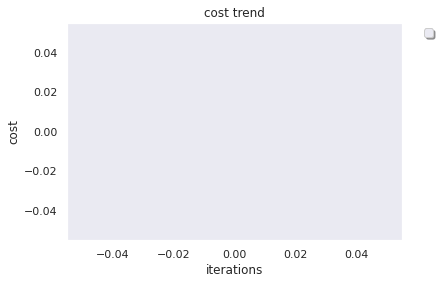

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


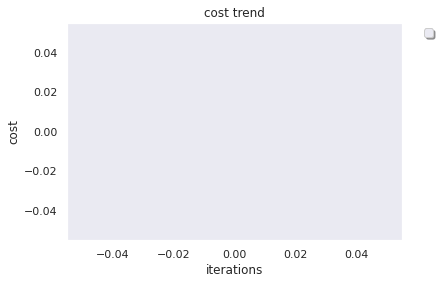

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


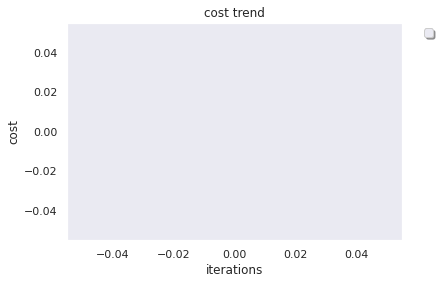

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


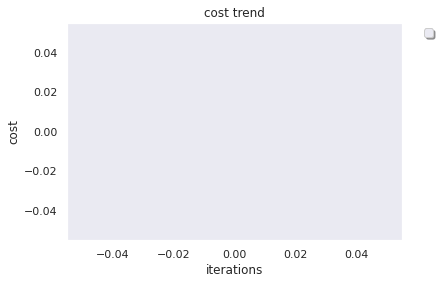

  0%|          | 0/1000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


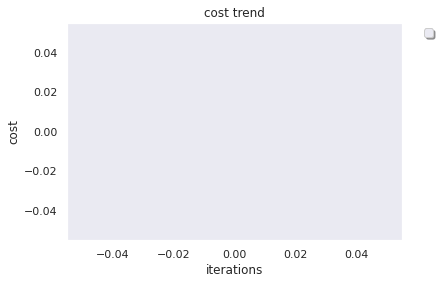

              precision    recall  f1-score   support

         1.0      0.217     1.000     0.356      1872
         2.0      0.543     0.125     0.204      1501
         3.0      0.000     0.000     0.000      1851
         4.0      0.000     0.000     0.000      1781
         5.0      0.000     0.000     0.000      2043

    accuracy                          0.228      9048
   macro avg      0.152     0.225     0.112      9048
weighted avg      0.135     0.228     0.108      9048



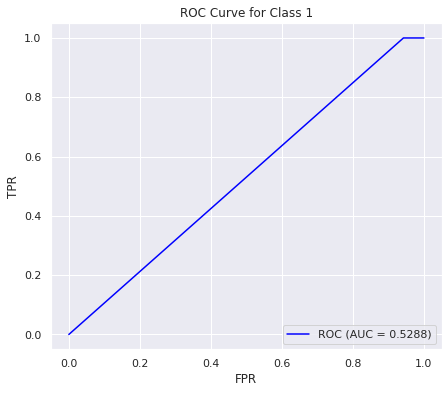

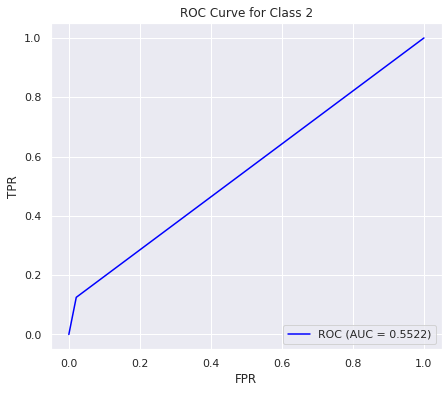

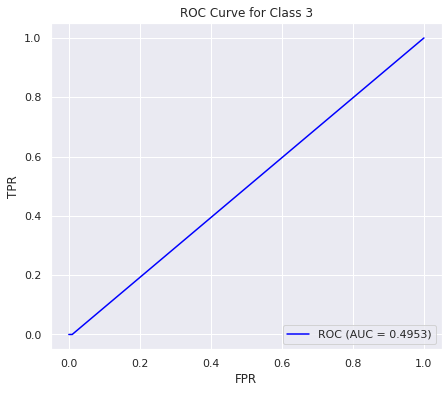

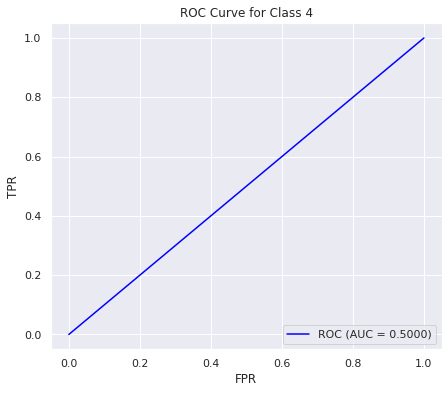

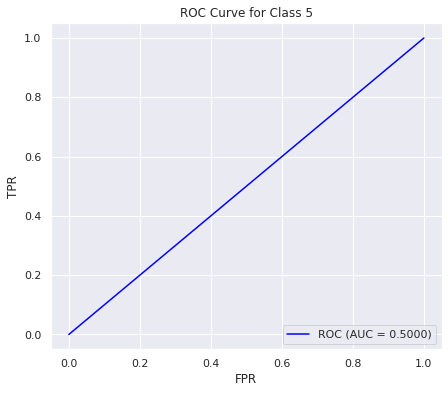

In [20]:
train_X1, train_y1 = train_df1.values[:, 2:-1],train_df1.values[:, -1]
train_X2, train_y2 = train_df2.values[:, 2:-1],train_df2.values[:, -1]
train_X3, train_y3 = train_df3.values[:, 2:-1],train_df3.values[:, -1]
train_X4, train_y4 = train_df4.values[:, 2:-1],train_df4.values[:, -1]
train_X5, train_y5 = train_df5.values[:, 2:-1],train_df5.values[:, -1]
test_X, test_y = test_df.values[:, 2:-1],test_df.values[:, -1]

#SMOTE oversampling
oversample = SMOTE()
train_X1, train_y1 = oversample.fit_resample(train_X1, train_y1)
train_X2, train_y2 = oversample.fit_resample(train_X2, train_y2)
train_X3, train_y3 = oversample.fit_resample(train_X3, train_y3)
train_X4, train_y4 = oversample.fit_resample(train_X4, train_y4)
train_X5, train_y5 = oversample.fit_resample(train_X5, train_y5)

lr_reg_os = LogisticRegression(train_X1, train_y1,train_X2,train_y2,train_X3,train_y3,train_X4,train_y4,
                        train_X5,train_y5,
                        test_X, test_y,learningRate = 0.00001, tolerance = 0, maxIteration = 1000,lamda=0.0001,regularization = 'l2')

lr_reg_os.run_model()

# 2. Applying PCA

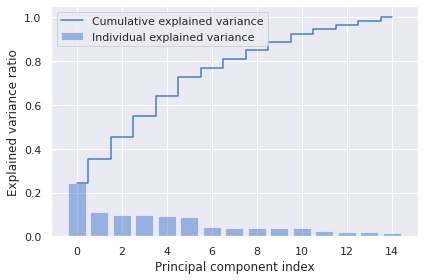

In [21]:
train_X1, train_y1 = train_df1.values[:, 2:-1],train_df1.values[:, -1]
train_X2, train_y2 = train_df2.values[:, 2:-1],train_df2.values[:, -1]
train_X3, train_y3 = train_df3.values[:, 2:-1],train_df3.values[:, -1]
train_X4, train_y4 = train_df4.values[:, 2:-1],train_df4.values[:, -1]
train_X5, train_y5 = train_df5.values[:, 2:-1],train_df5.values[:, -1]
test_df['BClass'] = test_df['Class']
test_X, test_y = test_df.values[:, 2:-1],test_df.values[:, -1]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(test_X)
test_X_std = sc.transform(test_X)
sc.fit(train_X1)
sc.fit(train_X2)
sc.fit(train_X3)
sc.fit(train_X4)
sc.fit(train_X5)
train_X1_std = sc.transform(train_X1)
train_X2_std = sc.transform(train_X2)
train_X3_std = sc.transform(train_X3)
train_X4_std = sc.transform(train_X4)
train_X5_std = sc.transform(train_X5)

#
# Import eigh method for calculating eigenvalues and eigenvectirs
#
from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(train_X1_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

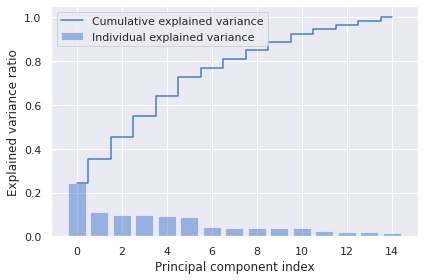

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(test_X)
test_X_std = sc.transform(test_X)

train_df = np.concatenate([train_X1,train_X2,train_X3,train_X4,train_X5])
sc.fit(train_df)
train_X_std = sc.transform(train_df)

from numpy.linalg import eigh
#
# Determine covariance matrix
#
cov_matrix = np.cov(train_X_std, rowvar=False)
#
# Determine eigenvalues and eigenvectors
#
egnvalues, egnvectors = eigh(cov_matrix)
#
# Determine explained variance
#
total_egnvalues = sum(egnvalues)
var_exp = [(i/total_egnvalues) for i in sorted(egnvalues, reverse=True)]
#
# Plot the explained variance against cumulative explained variance
#
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

pca.fit(train_X_std)

train_X1_pca = pca.transform(train_X1_std)
train_X2_pca = pca.transform(train_X2_std)
train_X3_pca = pca.transform(train_X3_std)
train_X4_pca = pca.transform(train_X4_std)
train_X5_pca = pca.transform(train_X5_std)
test_X_pca = pca.transform(test_X_std)



  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.


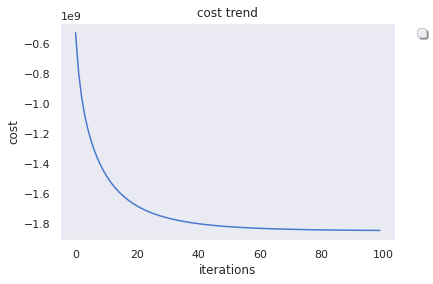

  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.


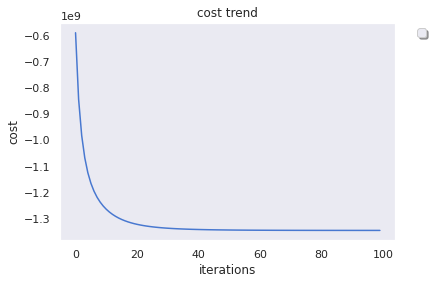

  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.


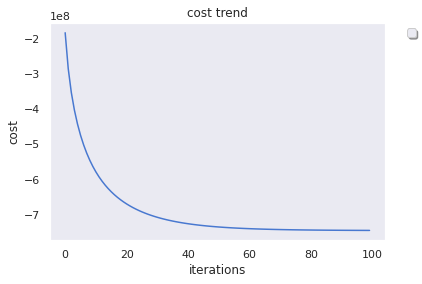

  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.


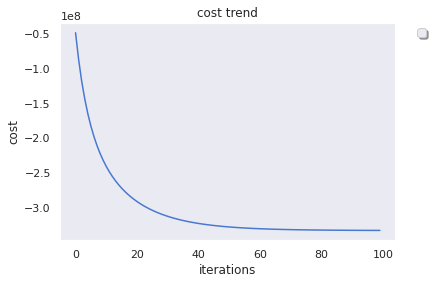

  0%|          | 0/100 [00:00<?, ?it/s]

No handles with labels found to put in legend.


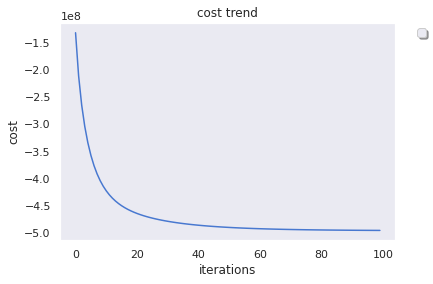

              precision    recall  f1-score   support

         1.0      0.043     0.017     0.024      1872
         2.0      0.788     0.742     0.765      1501
         3.0      0.345     0.437     0.385      1851
         4.0      0.104     0.121     0.112      1781
         5.0      0.473     0.580     0.521      2043

    accuracy                          0.371      9048
   macro avg      0.351     0.379     0.361      9048
weighted avg      0.338     0.371     0.350      9048



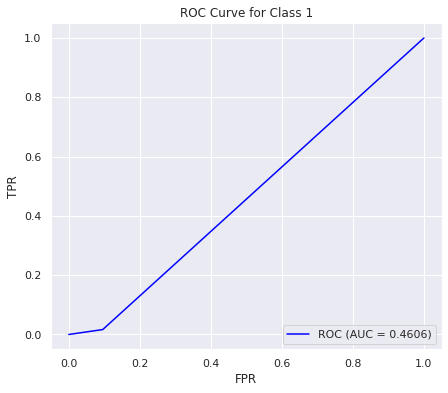

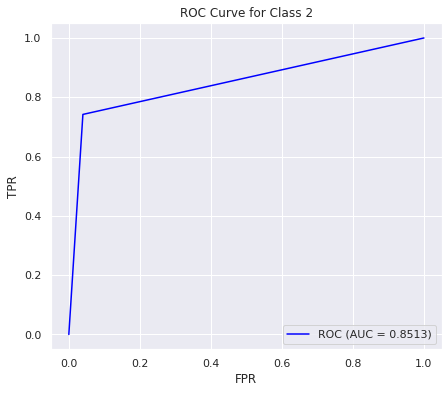

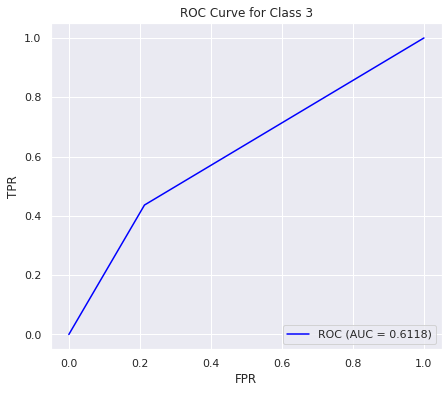

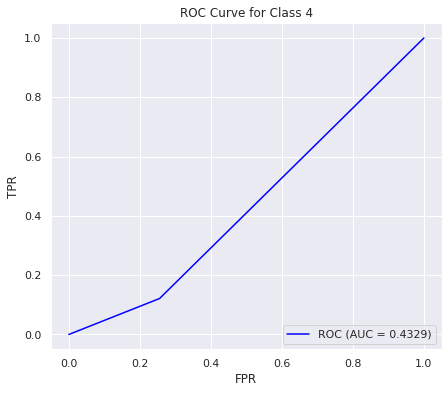

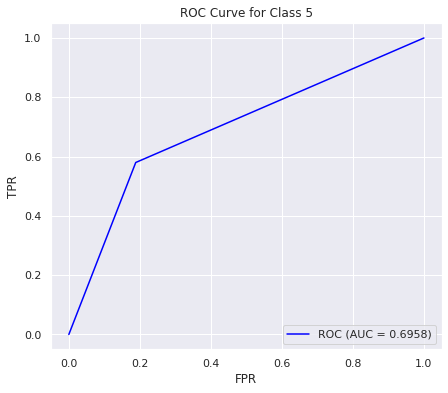

In [24]:
lr_pca = LogisticRegression(train_X1_pca, train_y1,train_X2_pca,train_y2,train_X3_pca,train_y3,train_X4_pca,train_y4,
                        train_X5_pca,train_y5,
                        test_X_pca, test_y,learningRate = 0.00001, tolerance = 0, maxIteration = 100,lamda=0.0001,regularization = 'l2')

lr_pca.run_model()

# Model 2: SVM


In [25]:
df = df_m.copy()
eda = EDA()

df = eda.missing_values(df, 15)
df = eda.impute_missing_values(df)


In [26]:
class HardMarginSVM(PreModelling):
  def __init__(self, learning_rate = 0.0001, lambda_param = 0.001, n_iters = 100):
    super().__init__()
    self.learning_rate = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.colors = ['blue','red']
    self.cmap = pltcolors.ListedColormap(self.colors)
  
  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_ = np.where(y <= 0, -1, 1)

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1

        if condition:
          self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
        
        else:
          self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i , y_[idx]))
          self.b -= self.learning_rate * (-y_[idx])

  def predict(self, X):
    pred_ = np.dot(X, self.w) + self.b
    return pred_

  
  def visualize_svm(self, X, y, clf):
      def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

      fig = plt.figure()
      ax = fig.add_subplot(1,1,1)
      plt.scatter(X[:,0], X[:,1], marker='o',c=y, cmap='viridis')

      x0_1 = np.amin(X[:,0])
      x0_2 = np.amax(X[:,0])

      x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
      x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

      x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
      x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

      x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
      x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

      ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
      ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
      ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

      x1_min = np.amin(X[:,1])
      x1_max = np.amax(X[:,1])
      ax.set_ylim([x1_min-3,x1_max+3])

      plt.show()

  def generateBatchBipolar(self, n, mu=0.5, sigma=0.2):
      """ Two gaussian clouds on each side of the origin """
      X = np.random.normal(mu, sigma, (n, 2))
      yB = np.random.uniform(0, 1, n) > 0.5
      # y is in {-1, 1}
      y = 2. * yB - 1
      X *= y[:, np.newaxis]
      X -= X.mean(axis=0)
      return X, y

  def plotLine(self, ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
      """ Plot a (separating) line given the normal vector (weights) and point of intercept """
      if type(x0) == int or type(x0) == float or type(x0) == np.float64:
          x0 = [0, -x0 / w[1]]
      yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
      ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)
      
      
  def plotSvm(self, X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
              ax=None, bound=[[-1., 1.], [-1., 1.]]):
      """ Plot the SVM separation, and margin """
      if ax is None:
          fig, ax = plt.subplots(1)
      
      im = ax.scatter(X[:,0], X[:,1], c=y, cmap=self.cmap, alpha=0.5, label=label)
      if support is not None:
          ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none', 
                    edgecolors='y', color='y')
          print("Number of support vectors = %d" % (len(support)))
      if w is not None:
          xx = np.array(bound[0])
          self.plotLine(ax, xx, w, intercept, separatorLabel)
          # Plot margin
          if support is not None:
              signedDist = np.matmul(support, w)
              margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
              supportMaxNeg = support[np.argmin(signedDist)]
              self.plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
              supportMaxPos = support[np.argmax(signedDist)]
              self.plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
              ax.set_title('Margin = %.3f' % (margin))
      ax.legend(loc='upper left')
      ax.grid()
      ax.set_xlim(bound[0])
      ax.set_ylim(bound[1])
      cb = plt.colorbar(im, ax=ax)
      loc = np.arange(-1,1,1)
      cb.set_ticks(loc)
      cb.set_ticklabels(['-1','1'])


In [27]:
def compute_roc(y_true, y_pred):

    y_true1, y_pred1 = y_true.copy(), y_pred.copy()
    y_true2, y_pred2 = y_true.copy(), y_pred.copy()
    y_true3, y_pred3 = y_true.copy(), y_pred.copy()
    y_true4, y_pred4 = y_true.copy(), y_pred.copy()
    y_true5, y_pred5 = y_true.copy(), y_pred.copy()

    y_true1[y_true1 != 1.0] = 0
    y_pred1[y_pred1 != 1.0] = 0

    y_true2[y_true2 != 2] = 0
    y_true2[y_true2 == 2] = 1
    y_pred2[y_pred2 != 2] = 0
    y_pred2[y_pred2 == 2] = 1

    y_true3[y_true3 != 3] = 0
    y_true3[y_true3 == 3] = 1
    y_pred3[y_pred3 != 3] = 0
    y_pred3[y_pred3 == 3] = 1

    y_true4[y_true4 != 4] = 0
    y_true4[y_true4 == 4] = 1
    y_pred4[y_pred4 != 4] = 0
    y_pred4[y_pred4 == 4] = 1

    y_true5[y_true5 != 5] = 0
    y_true5[y_true5 == 5] = 1
    y_pred5[y_pred5 != 5] = 0
    y_pred5[y_pred5 == 5] = 1

    fpr, tpr, _ = metrics.roc_curve(y_true1, y_pred1)
    auc_score = metrics.auc(fpr, tpr)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 1")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true2, y_pred2)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 2")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true3, y_pred3)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 3")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true4, y_pred4)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 4")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    fpr, tpr, _ = metrics.roc_curve(y_true5, y_pred5)
    auc_score = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
    plt.legend(loc='lower right')
    plt.title("ROC Curve for Class 5")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    return fpr, tpr, auc_score


In [28]:
def one_vs_rest_dfs():
  df['BClass'] = 1
  dfs = {}
  for i in range(1,6):
    dfs[f'df{i}'] = df.copy()

    dfs[f'df{i}'].loc[dfs[f'df{i}']['Class'] != i, 'BClass'] = -1

    train_df = dfs[f'df{i}'][dfs[f'df{i}']["User"] != 0]

    train_X, train_y = train_df.values[:, 2:-1],train_df.values[:, -1]

    dfs[f'train_X{i}']=train_X
    dfs[f'train_y{i}']=train_y
    
  return dfs
    
dfs = one_vs_rest_dfs()
test_df = df[df["User"] == 0]
test_df['BClass'] = test_df['Class']
test_X, test_y = test_df.values[:, 2:-1],test_df.values[:, -1]




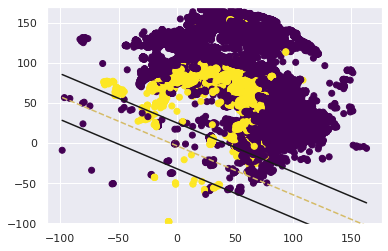

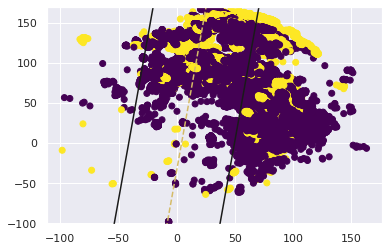

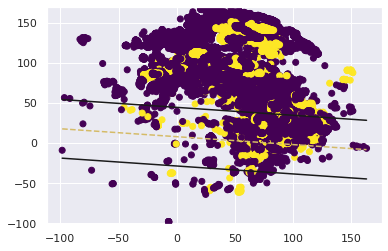

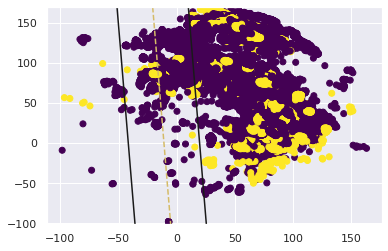

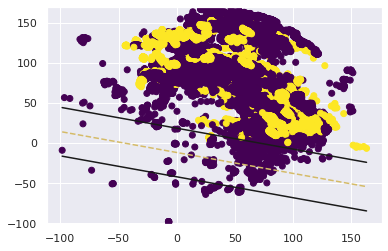

              precision    recall  f1-score   support

         1.0      0.000     0.000     0.000      1872
         2.0      1.000     0.001     0.001      1501
         3.0      0.000     0.000     0.000      1851
         4.0      0.556     0.003     0.006      1781
         5.0      0.226     1.000     0.369      2043

    accuracy                          0.226      9048
   macro avg      0.356     0.201     0.075      9048
weighted avg      0.326     0.226     0.085      9048



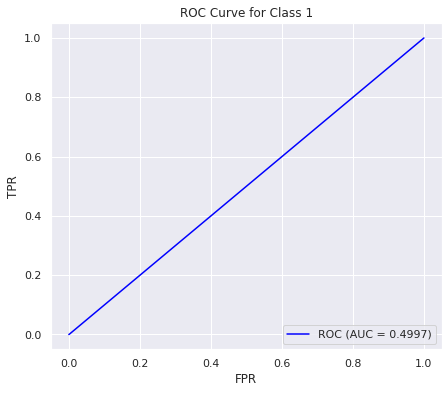

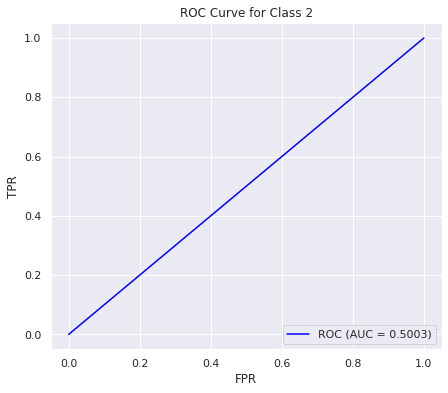

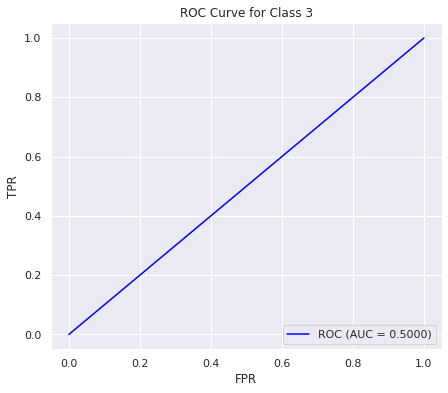

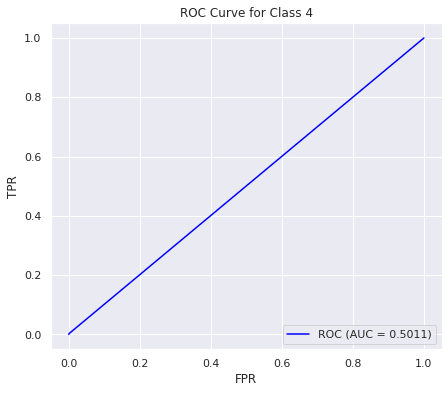

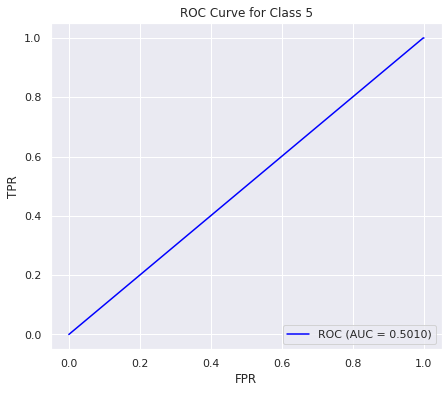

(array([0.        , 0.99800143, 1.        ]),
 array([0., 1., 1.]),
 0.5009992862241257)

In [29]:

pred_list = []
for i in [1,2,3,4,5]:
  clf = HardMarginSVM()
  clf.fit(dfs[f'train_X{i}'], dfs[f'train_y{i}'])
  pred = clf.predict(test_X)
  pred_list.append(pred)
  clf.visualize_svm(dfs[f'train_X{i}'], dfs[f'train_y{i}'], clf)

##Performance matrices
#Create a 2D distance array
pred_final = np.vstack(pred_list)

y_hat_test = np.argmax(pred_final.T,axis=1)+1

print(metrics.classification_report(test_y, y_hat_test, digits=3))

compute_roc(test_y,y_hat_test)

# Model 3: Naive Bayes

In [30]:
df = df_m.copy()
eda = EDA()

df = eda.missing_values(df, 15)
df = eda.impute_missing_values(df)


In [31]:
class NaiveBayes:
    def __init__(self, 
                 X_train, 
                 y_train, 
                 laplace=False, 
                 alpha = 1, 
                 gaussian=False) -> None:
        self.laplace = laplace
        self.alpha = alpha
        self.gaussian = gaussian
        self.d = {}
        self.X_train = X_train
        self.y_train = y_train

    def fit_distribution(self, data):
        mean = np.mean(data)
        sigma = np.std(data)
        dist = norm(mean, sigma)
        return dist
    
    def probability(self, X, prior, *dist):
        p = 1
        i = 0
        for d in dist:
            p = p * d.pdf(X[i])
            i+=1
        return prior * p

    def Laplace_smoothing(self, value, term):
        if term == 'n':
            return value + self.alpha
        else:
            return value + self.alpha*self.X_train.shape[1]
    
    def accuracy_metric(self, actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0
    
    def fit(self):
        self.data_dict = {}
        self.prior_dict = {}
        n_cols = self.X_train.shape[1]
        for i in range(1,6):
            chunk = self.X_train[self.y_train == i]
            self.data_dict[f"X{i}_train"] = chunk
            self.prior_dict[f"prior_y{i}"] = len(chunk) / len(self.X_train)
        
        if self.gaussian:
            self.guass_dict = {}
            for i in range(5):
                l = []
                for j in range(n_cols): # no.of columns
                  dst = self.fit_distribution(self.data_dict[f'X{i+1}_train'].iloc[:, j])
                  l.append(dst)
                self.guass_dict[f'dist_y{i}'] = l

        elif self.laplace:
            for y in range(1,6):#each class
              for predictor in range(self.X_train.shape[1]):#each column

                for i in np.unique(self.X_train.iloc[:, predictor], axis=0):#each occurence
                    x_df = self.data_dict[f"X{y}_train"]
                    if self.laplace:
                        self.d[f"{y}_{predictor}_{i}"] = self.Laplace_smoothing(len(x_df[x_df.iloc[:, predictor] == i]), 'n')/self.Laplace_smoothing(len(x_df), 'd')
                    else:
                        self.d[f"{y}_{predictor}_{i}"] = len(x_df[x_df.iloc[:, predictor] == i])/len(x_df)
        else:
            return "NO Model selected."

        
    def predict(self, X_test):
        y_pred = []
        self.y_pred_probs = []
        
        for row in X_test.iterrows():
            py_list = []
            for i in range(5):
              
              if self.gaussian:
                  py_list.append(self.probability(row[1], self.prior_dict[f'prior_y{i+1}'], *self.guass_dict[f'dist_y{i}']))
              elif self.laplace:
                  py = self.prior_dict[f'prior_y{i+1}']
                  for j in range(X_test.shape[1]):
                      py = py * self.d.get(f"{i+1}_{j}_{row[1][j]}", 1)
                  py_list.append(py)
              else:
                  return "NO Model selected."
            pred = py_list.index(max(py_list))+1
            y_pred.append(pred)
            self.y_pred_probs.append([i/sum(py_list) for i in py_list])
        return y_pred
    
    def plot_roc(self, y_test):
        # roc curve for classes
        fpr = {}
        tpr = {}
        thresh ={}

        pred_prob = np.array(self.y_pred_probs) 

        for i in range(5):    
            fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i+1)

        # plotting    
        plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
        plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
        plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
        plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 4 vs Rest')
        plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 5 vs Rest')
        plt.title('Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig('Multiclass ROC',dpi=300)
            

              precision    recall  f1-score   support

           1      0.987     0.930     0.958      4868
           2      0.817     0.880     0.847      4527
           3      0.875     0.870     0.873      4834
           4      0.840     0.810     0.825      4427
           5      0.825     0.846     0.835      4773

    accuracy                          0.868     23429
   macro avg      0.869     0.867     0.868     23429
weighted avg      0.870     0.868     0.869     23429

86.81121686798411


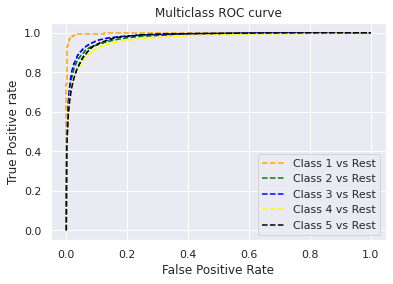

In [32]:

df = df.astype('int')
X = df.iloc[:, 1:]
X.head()
y = df['Class']
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state  = 0)
y_test = y_test.tolist()

#accuracy_list = []
#for i in range(1,20):
nb = NaiveBayes(X_train, y_train, True, 0.0001 , False)
nb.fit()
y_pred = nb.predict(X_test)
accuracy = nb.accuracy_metric(y_test, y_pred)
#accuracy_list.append(accuracy)

nb.plot_roc(y_test)

print(metrics.classification_report(y_test, y_pred, digits=3))
    
#plt.plot(accuracy_list)
print(accuracy)

In [ ]:

df = df.astype('int')
X = df.iloc[:, 1:]
X.head()
y = df['Class']
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state  = 0)
y_test = y_test.tolist()

#accuracy_list = []
#for i in range(1,20):
nb = NaiveBayes(X_train, y_train, False, 0.0001 , True)
nb.fit()
y_pred = nb.predict(X_test)
accuracy = nb.accuracy_metric(y_test, y_pred)
#accuracy_list.append(accuracy)

nb.plot_roc(y_test)

print(metrics.classification_report(y_test, y_pred, digits=3))
    
#plt.plot(accuracy_list)
print(accuracy)

# Neural Networks

In [ ]:
df = df_m.copy()
eda = EDA()

df = eda.missing_values(df, 15)
df = eda.impute_missing_values(df)


In [ ]:
#creating the model NN  with Hidden layer -1  with 8 nodes  , 14 input nodes and 5 output nodes
from sklearn.neural_network import MLPClassifier

X, y =df.iloc[:,2:-1], df.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)


nn1 = MLPClassifier(hidden_layer_sizes=(8),max_iter=500)

nn1.fit(X_train,y_train)

#testing model
predictions = nn1.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
#print(predictions)
#print (y_test)
print(f'Confusion matrix for class predictions made on test data')
print(confusion_matrix(y_test,predictions))
print(f'First NN Model- Hidden layer -1  with 8 nodes  performance on test data')
print(classification_report(y_test,predictions))


In [ ]:
# creating model 2 with single hidden layer and 10 nodes 
nn2 = MLPClassifier(hidden_layer_sizes=(10),max_iter=500)

nn2.fit(X_train,y_train)

# testing model 2
predictions = nn2.predict(X_test)
print(f'Confusion matrix for class predictions made on test data')
print(confusion_matrix(y_test,predictions))
print(f'Second NN Model- Hidden layer -1  with 10 nodes  performance on test data')
print(classification_report(y_test,predictions))


In [ ]:

# creating model 3 with two hiden layer,  10 nodes and 8 nodes in each respectively 

nn3 = MLPClassifier(hidden_layer_sizes=(10, 8),max_iter=500)

nn3.fit(X_train,y_train)

# testing model 3
predictions = nn3.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))



#Summary from Nueral Network 

### Evaluation- as we can see the Model 3 has shown improvement  with adding more hidden layers and Model 2 is performing better than Model 1 by just adding 2 more nodes. 
# Model 1 --> accuracy of prediction was 0.11
# Model 2 --> accuracy of prediction was 0.12
# Model 3 --> accuracy of prediction was 0.13

In [ ]:
#resetting index of ddataset
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


In [ ]:
#checking  each classes ratio in y_train
d1=y_train[y_train==1].shape[0]
d2=y_train[y_train==2].shape[0]
d3=y_train[y_train==3].shape[0]
d4=y_train[y_train==4].shape[0]
d5=y_train[y_train==5].shape[0]
total_records_train = d1+d2+d3+d4+d5
print(f'Total record in train for classes is {total_records_train}\n')
print(f'Ratio of class 1 is {d1/(total_records_train )* 100}%\n')
print(f'Ratio of class 2 is {d2/(total_records_train )* 100}%\n')
print(f'Ratio of class 3 is {d3/(total_records_train )* 100}%\n')
print(f'Ratio of class 4 is {d4/(total_records_train )* 100}%\n')
print(f'Ratio of class 5 is {d5/(total_records_train )* 100}%\n')

In [ ]:
## 2.4 Checking the Test and Train ratio for y for each  of the five classes

In [ ]:

#checking  each classes ratio in y_test
dt1=y_test[y_test==1].shape[0]
dt2=y_test[y_test==2].shape[0]
dt3=y_test[y_test==3].shape[0]
dt4=y_test[y_test==4].shape[0]
dt5=y_test[y_test==5].shape[0]
total_records_test = dt1+dt2+dt3+dt4+dt5
print(f'Total record in test for classes is {total_records_test}\n')
print(f'Ratio of class 1 is {dt1/(total_records_test )* 100}%\n')
print(f'Ratio of class 2 is {dt2/(total_records_test )* 100}%\n')
print(f'Ratio of class 3 is {dt3/(total_records_test )* 100}%\n')
print(f'Ratio of class 4 is {dt4/(total_records_test )* 100}%\n')
print(f'Ratio of class 5 is {dt5/(total_records_test )* 100}%\n')
